## How to Build a Recommendation Engine that isn’t MovieLens

Abstract:

> Recommendation engines are pretty simple. Or at least, they are made to seem simple by an uncountable number of online tutorials. The only problem: **it’s hard to find a tutorial that doesn’t use** the ready-made and pre-baked **MovieLens** dataset. Fine. But, perhaps you’ve followed one of these tutorials and have struggled to imagine how to, or otherwise implement your own recommendation engine on your own data. In this workshop, I’ll show you how to use industry-leading open source tools to **build your own engine** and how to **structure your own data** so that it might be “recommendation-compatible”.

![](images/about_max.png)

### MovieLens

![](images/movielens.png)

### Quickstart

![](images/light_fm.png)

[Source](https://github.com/lyst/lightfm)

```sh
pip install lightfm
```

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from lightfm import LightFM
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import precision_at_k

data = fetch_movielens(min_rating=5.0)
model = LightFM(loss='warp')
model.fit(data['train'], epochs=30, num_threads=2)

precision_at_k(model, data['test'], k=5).mean()

0.048348743

In [3]:
data

{'train': <943x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 19048 stored elements in COOrdinate format>,
 'test': <943x1682 sparse matrix of type '<class 'numpy.int32'>'
 	with 2153 stored elements in COOrdinate format>,
 'item_features': <1682x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 1682 stored elements in Compressed Sparse Row format>,
 'item_feature_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object),
 'item_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object)}

In [4]:
data['train']

<943x1682 sparse matrix of type '<class 'numpy.float32'>'
	with 19048 stored elements in COOrdinate format>

### Data

![](images/halloween.png)

![](images/candy.jpg)

![](images/influenster.png)

This *was* working on 2019-10-19:

```python
import time
import json
import random
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
from gazpacho import Soup
from tqdm import tqdm
import pandas as pd

options = Options()
options.headless = True
browser = Firefox(options=options)

def make_soup(url):
    browser.get(url)
    html = browser.page_source
    soup = Soup(html)
    return soup

def build_review_url(product, page):
    base = 'https://www.influenster.com'
    url = f'{base}/{product}?review_sort=most+recent&review_page={page}'
    return url

def parse_review(product, review):
    stars = int(review.find('div', {'class': 'avg-stars'}).attrs['data-stars'])
    user = review.find('div', {'class': 'content-item-author-info'}).find('a').attrs['href'][1:]
    return {'product': product, 'user': user, 'stars': stars}

def scrape_product_page(product, page):
    url = build_review_url(product, page)
    soup = make_soup(url)
    page_reviews = soup.find('div', {'class': 'content-item review-item'})
    return [parse_review(product, r) for r in page_reviews]

def scrape_product(product):
    url = build_review_url(product, 1)
    soup = make_soup(url)
    pages = int(
        soup.find('div', {'class': 'product-highlights-results'})
        .text
        .replace(',', '')
        .split(' ')[0]
    ) // 10 + 1
    pages = min(pages, 100)
    pages = list(range(1, pages+1))
    random.shuffle(pages)
    reviews = []
    for page in pages:
        print(f'scraping page: {page}')
        page_reviews = scrape_product_page(product, page)
        reviews.extend(page_reviews)
        time.sleep(random.randint(1, 10) / 10)
    return reviews

def scrape_index(category='sweets-candy-gum'):
    product_index = []
    for page in tqdm(range(1, 10+1)):
        url = f'https://www.influenster.com/reviews/{category}?page={page}'
        soup = make_soup(url)
        products = soup.find('a', {'class': 'category-product'}, strict=True)
        products = [p.attrs['href'] for p in products]
        candy.extend(products)
        time.sleep(random.randint(1, 10) / 10)
    return product_index

if __name__ == '__main__':

    product_index = scrape_index(category='sweets-candy-gum')

    product_reviews = []
    for product in tqdm(product_index):
        print(f'scraping: {product}')
        try:
            reviews = scrape_product(product)
            product_reviews.extend(reviews)
        except:
            pass
        time.sleep(random.randint(1, 10) / 10)

    df = pd.DataFrame(product_reviews)
    df.to_csv('data/candy.csv', index=False)
```

![](images/cat_and_mouse.jpg)

### Scrape 

![](images/influenster_index.png)

[Source](https://www.influenster.com/reviews/sweets-candy-gum)

In [5]:
with open('influenster/index.html', 'r') as f:
    html = f.read()

In [6]:
print(html[:500])

<!DOCTYPE html>
<html class="site-desktop svg " lang="en">
<head>
<meta http-equiv="content-type" content="text/html; charset=UTF-8">
<title>Sweets, Candy &amp; Gum Product Reviews, Questions and Answers | Influenster</title>
<meta name="title" content="Sweets, Candy &amp; Gum Product Reviews, Questions and Answers | Influenster">
<meta name="description" content="Got a sweet tooth? So do our users. Discover the best candy, gum, or chocolate for you from over thousands of reviews from our users.


![](images/gazpacho.png)

### gazpacho

```
pip install gazpacho
```

In [7]:
from gazpacho import Soup

In [8]:
soup = Soup(html)

In [9]:
products = soup.find('a', {'class': 'category-product'})

In [10]:
products[0]

<a class="category-product" href="https://www.influenster.com/reviews/reeses-peanut-butter-cups-miniatures-76"><div class="category-product-image-container"><div class="category-product-image" style="background-image: url("index_files/51107862.jpg");"><img itemprop="image" data-img="div" src="index_files/51107862.jpg" alt="Reese's Peanut Butter Cups Miniatures" width="0" height="0"></div></div><div class="category-product-detail"><div class="category-product-title" data-truncate-lines="3" style="overflow-wrap: break-word;">Reese's Peanut Butter Cups Miniatures</div><div class="category-product-brand">
By Reese's
</div><div class="category-product-stars"><div class="avg-stars small " data-stars="4.82880054868237"><div class="star"><i class="star-icon"></i><div class="progress" data-star="1" data-progress="100"></div></div><div class="star"><i class="star-icon"></i><div class="progress" data-star="2" data-progress="100"></div></div><div class="star"><i class="star-icon"></i><div class="p

In [11]:
products = [p.attrs['href'] for p in products]

In [12]:
products[:5]

['https://www.influenster.com/reviews/reeses-peanut-butter-cups-miniatures-76',
 'https://www.influenster.com/reviews/ferrero-rocher-chocolate',
 'https://www.influenster.com/reviews/kit-kat-crisp-wafers-in-milk-chocolate',
 'https://www.influenster.com/reviews/lindt-lindor-milk-chocolate-truffles',
 'https://www.influenster.com/reviews/hersheys-cookies-n-creme-candy-bar']

![](images/influenster_skittles.png)

In [13]:
with open('influenster/skittles.html', 'r') as f:
    html = f.read()

In [14]:
soup = Soup(html)

In [15]:
reviews = (soup
    .find('div', {'class': 'layoutComponents__Block-l2otzz-0 efHRYv'}, strict=True)
    .find('div', {'class': 'item wrappers__Wrapper-sc-1mex847-0 jEYnle'})
)

In [16]:
str(reviews[0])[:500]

'<div class="item wrappers__Wrapper-sc-1mex847-0 jEYnle">\n                                            <div class="author-card authorCard__AuthorCardWrapperDesktop-sc-26la3e-1 hAEwt"><a aria-label="anahce0f" href="/anahce0f">\n                                                    <div class="mediaComponents__ImageContainer-sc-1gsoaz-0 bEUCqQ" style="border-radius:50%" size="70"></div>\n                                                </a>\n                                                <div>\n          '

### Activity

Take 5 minutes to write a `parse_review` function

In [17]:
# hint 
review = reviews[0]
review.find('div', {'class': 'productComponents__SingleStar-sc-1ffpes9-3 kzXpnS'})

[<div class="productComponents__SingleStar-sc-1ffpes9-3 kzXpnS" size="20"></div>,
 <div class="productComponents__SingleStar-sc-1ffpes9-3 kzXpnS" size="20"></div>,
 <div class="productComponents__SingleStar-sc-1ffpes9-3 kzXpnS" size="20"></div>,
 <div class="productComponents__SingleStar-sc-1ffpes9-3 kzXpnS" size="20"></div>,
 <div class="productComponents__SingleStar-sc-1ffpes9-3 kzXpnS" size="20"></div>]

In [19]:
%load solutions/parse_review.py

In [20]:
parse_review(review)

{'user': 'anahce0f', 'stars': 5}

In [21]:
candy = [parse_review(r) for r in reviews]

candy

[{'user': 'anahce0f', 'stars': 5},
 {'user': 'rileyc2ef0', 'stars': 5},
 {'user': 'danielledowsett', 'stars': 5},
 {'user': 'candygirl7585', 'stars': 5},
 {'user': 'marnishaw', 'stars': 5},
 {'user': 'megfields', 'stars': 4},
 {'user': 'member-a58a7cd88', 'stars': 4},
 {'user': 'darcywood', 'stars': 5},
 {'user': 'amandaj64', 'stars': 5},
 {'user': 'member-930e4ca64', 'stars': 4}]

In [22]:
import pandas as pd

df = pd.DataFrame(candy)
df['item'] = 'skittles'

df

,stars,user,item
0,5,anahce0f,skittles
1,5,rileyc2ef0,skittles
2,5,danielledowsett,skittles
3,5,candygirl7585,skittles
4,5,marnishaw,skittles
5,4,megfields,skittles
6,4,member-a58a7cd88,skittles
7,5,darcywood,skittles
8,5,amandaj64,skittles
9,4,member-930e4ca64,skittles


### EDA

In [23]:
import pandas as pd

df = pd.read_csv('data/candy.csv')

df.sample(5)

,item,user,review
4992,Hubba Bubba Bubbletape Awesome Original,tina35,5
15912,Hershey's Kisses Milk Chocolates with Almonds,dawn87,4
11894,Twix,jacob44,5
6055,Brookside Dark Chocolate Acai Blueberry Flavors,rmeyers,5
14091,Kit Kat Minis Crisp Wafers in Milk Chocolate,cassandra39,5


In [24]:
df[df['user'] == 'zjohnson']

,item,user,review
2186,Skittles Sour Candy,zjohnson,5
6022,Haribo Sour Gold Bears Gummi Candy,zjohnson,5
7919,Starburst Original Fruit Chews,zjohnson,5
8382,Sour Patch Watermelon,zjohnson,5
12304,Sour Patch Kids Candy,zjohnson,4


In [25]:
df['item'].value_counts()[:5]

Twix                                       340
Snickers Chocolate Bar                     330
Werther's Original Caramel Hard Candies    322
M&Ms Peanut Chocolate Candy                310
M&Ms Milk Chocolate Candy                  273
Name: item, dtype: int64

In [26]:
df['item'].unique().shape

(142,)

In [27]:
df['user'].unique().shape

(2531,)

In [28]:
import chart # pip install chart

chart.histogram(df['review'], bins=5, height=20, mark='x')

        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
      x x
      x x
      x x
x x x x x



In [29]:
df['review'].value_counts()

5    12977
4     2554
3      967
2      372
1      364
Name: review, dtype: int64

In [30]:
df.groupby('user')['item'].count().mean()

6.809166337416041

### Sparsity

In [31]:
ex = pd.DataFrame([
    [0, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 1]], 
    columns=['twix', 'mars', 'reeses', 'skittles', 'snickers', 'lindt'])

ex

,twix,mars,reeses,skittles,snickers,lindt
0,0,1,1,0,0,0
1,0,1,1,1,0,0
2,1,0,0,1,0,0
3,0,1,1,0,0,1
4,0,0,0,1,1,1


In [32]:
r, c = ex.shape
ex.sum().sum() / (r * c)

0.43333333333333335

In [33]:
import sys

sys.getsizeof(ex)

344

In [34]:
ex.values

array([[0, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 1]])

In [35]:
from scipy.sparse import csc_matrix

sx = csc_matrix(ex.values)

In [36]:
sys.getsizeof(sx)

56

### Sparse Candy

In [37]:
df.sample(5)

,item,user,review
3425,5 Gum,jacobmarsh,5
9004,Lindt Lindor Stracciatella Chocolate,dreese,5
13241,Lindt Ultimate 8 Flavor Assortment Lindor Truf...,cynthia19,5
7012,Reese's Peanut Butter Cups Miniatures,christine24,4
2601,Kit Kat Minis Crisp Wafers in Milk Chocolate,fgross,5


In [38]:
import numpy as np

In [39]:
ratings = 'review'
users = 'user'
items = 'item'

ratings = np.array(df[ratings])
users = np.array(df[users])
items = np.array(df[items])

In [40]:
from scipy.sparse import csr_matrix

help(csr_matrix)

Help on class csr_matrix in module scipy.sparse.csr:

class csr_matrix(scipy.sparse.compressed._cs_matrix, scipy.sparse.sputils.IndexMixin)
 |  csr_matrix(arg1, shape=None, dtype=None, copy=False)
 |  
 |  Compressed Sparse Row matrix
 |  
 |  This can be instantiated in several ways:
 |      csr_matrix(D)
 |          with a dense matrix or rank-2 ndarray D
 |  
 |      csr_matrix(S)
 |          with another sparse matrix S (equivalent to S.tocsr())
 |  
 |      csr_matrix((M, N), [dtype])
 |          to construct an empty matrix with shape (M, N)
 |          dtype is optional, defaulting to dtype='d'.
 |  
 |      csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
 |          where ``data``, ``row_ind`` and ``col_ind`` satisfy the
 |          relationship ``a[row_ind[k], col_ind[k]] = data[k]``.
 |  
 |      csr_matrix((data, indices, indptr), [shape=(M, N)])
 |          is the standard CSR representation where the column indices for
 |          row i are stored in ``indices[indpt

In [41]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])

csr_matrix((data, (row, col)), shape=(3, 3)).toarray()

array([[1, 0, 2],
       [0, 0, 3],
       [4, 5, 6]], dtype=int64)

In [42]:
from sklearn.preprocessing import LabelEncoder

# heavy lifting encoders
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

# preparation for the csr matrix
u = user_encoder.fit_transform(users)
i = item_encoder.fit_transform(items)
lu = len(np.unique(u))
li = len(np.unique(i))

In [43]:
interactions = csr_matrix((ratings, (u, i)), shape=(lu, li))

In [44]:
interactions

<2531x142 sparse matrix of type '<class 'numpy.int64'>'
	with 17199 stored elements in Compressed Sparse Row format>

### Interaction Machine

In [45]:
class InteractionMachine:
    def __init__(self):
        self.user_encoder = LabelEncoder()
        self.item_encoder = LabelEncoder()

    def __repr__(self):
        return 'InteractionMachine()'

    def build(self, users, items, ratings):
        u = self.user_encoder.fit_transform(users)
        i = self.item_encoder.fit_transform(items)
        self.n_users = len(np.unique(u))
        self.n_items = len(np.unique(i))
        self.interactions = csr_matrix((ratings, (u, i)), shape=(self.n_users, self.n_items))
        return self

In [46]:
im = InteractionMachine()

im.build(df['user'], df['item'], df['review'])

interactions = im.interactions

In [47]:
interactions.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 5]], dtype=int64)

### Basic LightFM 

In [48]:
model = LightFM()

In [49]:
model.fit(interactions)

In [50]:
model.predict(interactions) # not exactly sklearn...

TypeError: predict() missing 1 required positional argument: 'item_ids'

In [51]:
model.predict(0, [1, 2, 3])

array([0.56528229, 0.96470243, 0.67090869])

### Evaluation

In [52]:
from lightfm.evaluation import auc_score, precision_at_k

> AUC measures the quality of the overall ranking. In the binary case, it can be interpreted as the probability that a randomly chosen positive item is ranked higher than a randomly chosen negative item. Consequently, an AUC close to 1.0 will suggest that, by and large, your ordering is correct: and this can be true even if none of the first K items are positives. This metric may be more appropriate if you do not exert full control on which results will be presented to the user; it may be that the first K recommended items are not available any more (say, they are out of stock), and you need to move further down the ranking. A high AUC score will then give you confidence that your ranking is of high quality throughout.

[Source](https://stackoverflow.com/questions/45451161/evaluating-the-lightfm-recommendation-model)

> Precision@K measures the proportion of positive items among the K highest-ranked items. As such, it's very focused on the ranking quality at the top of the list: it doesn't matter how good or bad the rest of your ranking is as long as the first K items are mostly positive. This would be an appropriate metric if you are only ever going to be showing your users the very top of the list.

[Source](https://stackoverflow.com/questions/45451161/evaluating-the-lightfm-recommendation-model)

In [53]:
auc_score(model, interactions).mean()

0.65189743

In [54]:
precision_at_k(model, interactions, k=10).mean()

0.11090478

### train-test-split

In [55]:
# don't do this...
from sklearn.model_selection import train_test_split

In [56]:
train_test_split(interactions)
# because...

[<1898x142 sparse matrix of type '<class 'numpy.int64'>'
 	with 12947 stored elements in Compressed Sparse Row format>,
 <633x142 sparse matrix of type '<class 'numpy.int64'>'
 	with 4252 stored elements in Compressed Sparse Row format>]

### Traditional 

![](images/tts_traditional.png)

### Recommendation

![](images/tts_reco.png)

In [57]:
# do this
from lightfm.cross_validation import random_train_test_split

In [58]:
train, test = random_train_test_split(interactions, test_percentage=0.2)

In [59]:
train

<2531x142 sparse matrix of type '<class 'numpy.int64'>'
	with 13759 stored elements in COOrdinate format>

In [60]:
test

<2531x142 sparse matrix of type '<class 'numpy.int64'>'
	with 3440 stored elements in COOrdinate format>

### Training Cycle

In [61]:
model = LightFM()
model.fit(train, epochs=500)

In [62]:
auc_score(model, test).mean()

0.6707769

In [64]:
model = LightFM()

scores = []
for e in range(100):
    model.fit_partial(train, epochs=1)
    auc_train = auc_score(model, train).mean()
    auc_test = auc_score(model, test).mean()
    scores.append((auc_train, auc_test))
    
scores = np.array(scores)

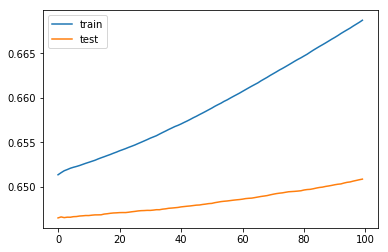

In [66]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.plot(scores[:, 0], label='train')
plt.plot(scores[:, 1], label='test')
plt.legend()

### Loss

> WARP: Weighted Approximate-Rank Pairwise loss. Maximises
  the rank of positive examples by repeatedly sampling negative
  examples until rank violating one is found. Useful when only
  positive interactions are present and optimising the top of
  the recommendation list (precision@k) is desired.

In [67]:
model = LightFM(loss='warp')

scores = []
for e in range(100):
    model.fit_partial(train, epochs=1)
    auc_train = auc_score(model, train).mean()
    auc_test = auc_score(model, test).mean()
    scores.append((auc_train, auc_test))
    
scores = np.array(scores)

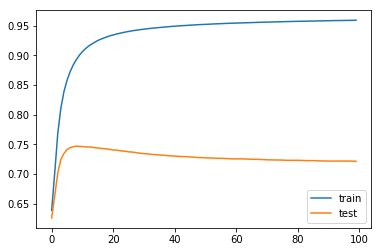

In [68]:
from matplotlib import pyplot as plt

plt.plot(scores[:, 0], label='train')
plt.plot(scores[:, 1], label='test')
plt.legend()

### Activity

Take 5 minutes to explore different epoch and loss combinations

### Early Stopping

In [69]:
from copy import deepcopy

model = LightFM(loss='warp')

count = 0
best = 0
scores = []
for e in range(100):
    if count > 5: # patience
        break
    model.fit_partial(train, epochs=1)
    auc_train = auc_score(model, train).mean()
    auc_test = auc_score(model, test).mean()
    print(f'Epoch: {e}, Train AUC={auc_train:.3f}, Test AUC={auc_test:.3f}')
    scores.append((auc_train, auc_test))
    if auc_test > best:
        best_model = deepcopy(model)
        best = auc_test
    else:
        count += 1

model = deepcopy(best_model)

Epoch: 0, Train AUC=0.643, Test AUC=0.633
Epoch: 1, Train AUC=0.704, Test AUC=0.670
Epoch: 2, Train AUC=0.771, Test AUC=0.712
Epoch: 3, Train AUC=0.810, Test AUC=0.732
Epoch: 4, Train AUC=0.835, Test AUC=0.744
Epoch: 5, Train AUC=0.854, Test AUC=0.750
Epoch: 6, Train AUC=0.868, Test AUC=0.753
Epoch: 7, Train AUC=0.879, Test AUC=0.754
Epoch: 8, Train AUC=0.888, Test AUC=0.754
Epoch: 9, Train AUC=0.895, Test AUC=0.754
Epoch: 10, Train AUC=0.902, Test AUC=0.753
Epoch: 11, Train AUC=0.907, Test AUC=0.752
Epoch: 12, Train AUC=0.912, Test AUC=0.751
Epoch: 13, Train AUC=0.915, Test AUC=0.750
Epoch: 14, Train AUC=0.919, Test AUC=0.749


### New Predictions

In [70]:
user = 'aaron67'
df[df['user'] == user]

,item,user,review
13806,Mike and Ike Sour Licious Zours,aaron67,4
14073,Kit Kat Minis Crisp Wafers in Milk Chocolate,aaron67,5
14396,Reese's Peanut Butter Cup Pumpkins Milk Chocolate,aaron67,5
15153,Snickers Crisper Chocolate Bar,aaron67,1
15296,Snickers Peanut Butter Squared Bars,aaron67,5
16867,Reese's Peanut Butter Heart,aaron67,5


In [71]:
im.user_encoder.transform([user])[0]

0

In [72]:
user_id = im.user_encoder.transform([user])[0]

In [73]:
preds = model.predict(user_id, list(range(im.n_items)))
preds = pd.DataFrame(zip(preds, im.item_encoder.classes_), columns=['pred', 'item'])
preds = preds.sort_values('pred', ascending=False)
preds.head()

,pred,item
98,0.885073,Reese's Reeses Peanut Butter Trees
96,0.819415,Reese's Peanut Butter Heart
101,0.783587,Reese's White Peanut Butter Eggs
28,0.551765,Ghirardelli Squares Peppermint Bark
97,0.405660,Reese's Pieces Peanut Butter Candy


In [74]:
tried = df[df['user'] == user]['item'].values
list(preds[~preds['item'].isin(tried)]['item'].values[:5])

["Reese's Reeses Peanut Butter Trees",
 "Reese's White Peanut Butter Eggs",
 'Ghirardelli Squares Peppermint Bark',
 "Reese's Pieces Peanut Butter Candy",
 "Reese's Peanut Butter Egg"]

### New Users

![](images/willy.jpg)

### Unless...

In [75]:
ex = pd.DataFrame([
    [0, 1, 1, 0, 0, 0], 
    [0, 1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 1]
])

In [76]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(ex)

array([[0.        , 1.        , 2.        , 1.        , 2.23606798],
       [1.        , 0.        , 1.73205081, 1.41421356, 2.        ],
       [2.        , 1.73205081, 0.        , 2.23606798, 1.73205081],
       [1.        , 1.41421356, 2.23606798, 0.        , 2.        ],
       [2.23606798, 2.        , 1.73205081, 2.        , 0.        ]])

In [77]:
df = pd.read_csv("data/candy.csv")
df = df[df['review'] >= 4]

In [78]:
df.sample(5)

,item,user,review
12328,York Peppermint Patty,steven84,5
188,Swedish Fish Red Candy,whiteheadkevin,5
10054,Dove Chocolate Promises Silky Smooth Almond Da...,brianmonroe,5
3552,Hershey's Almond Joy Candy Bar,joseph98,5
11061,Brookside Dark Chocolate Pomegranate Flavor,troy17,5


In [79]:
df = df.groupby(["user"])["item"].apply(lambda x: ",".join(x))
df = pd.DataFrame(df)
df.head()

,item
user,
aaron67,"Mike and Ike Sour Licious Zours,Kit Kat Minis ..."
aaron68,"Hubba Bubba Bubbletape Awesome Original,Brooks..."
aaron73,Dove Chocolate Promises Silky Smooth Sea Salt ...
abarker,"Reese's Peanut Butter Bunny,Ghirardelli Gourme..."
abigail04,"Kit Kat Minis Crisp Wafers in Milk Chocolate,P..."


In [80]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=lambda x: x.split(","), max_features=250)
X = cv.fit_transform(df['item'])

In [81]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5)
nn.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [82]:
neighbors = nn.kneighbors(X, return_distance=False)
neighbors

array([[   0, 2042,  920,  186, 1625],
       [   1,  404, 2424, 1110, 2370],
       [   2, 2221,  677, 1386,  739],
       ...,
       [2525,  620,  782,  661, 1546],
       [2526,  308, 2236,  177,  801],
       [2527, 1252, 1350, 2111, 2346]])

In [83]:
neighbors[0]

array([   0, 2042,  920,  186, 1625])

In [84]:
candy = []
for n in neighbors[0]:
    c = df.iloc[int(n)].values[0].split(",")
    candy.extend(c)
    
list(set(candy))

['Snickers Peanut Butter Squared Bars',
 'Kraft Vanilla Caramels Snack Bags',
 "Reese's Peanut Butter Cup Pumpkins Milk Chocolate",
 'Kit Kat Minis Crisp Wafers in Milk Chocolate',
 'Sour Punch Real Rainbow Straws',
 'Mounds Candy Bar',
 "Hershey's Natural Unsweetened Cocoa",
 'Nestle Butterfinger Bites',
 'Jet Puffed Stackermallows Marshmallows',
 'Kirkland Milk Chocolate Almonds',
 "Reese's Peanut Butter Heart",
 'Mike and Ike Sour Licious Zours',
 'Airheads Bites Fruit']

### Putting a bow on it

In [85]:
df = pd.read_csv("data/candy.csv")
df = df[df['review'] >= 4]
df = df.groupby(["user"])["item"].apply(lambda x: ",".join(x))
df = pd.DataFrame(df)
df.head()

,item
user,
aaron67,"Mike and Ike Sour Licious Zours,Kit Kat Minis ..."
aaron68,"Hubba Bubba Bubbletape Awesome Original,Brooks..."
aaron73,Dove Chocolate Promises Silky Smooth Sea Salt ...
abarker,"Reese's Peanut Butter Bunny,Ghirardelli Gourme..."
abigail04,"Kit Kat Minis Crisp Wafers in Milk Chocolate,P..."


In [86]:
class NNRecommender:
    def __init__(
        self, n_neighbors=5, max_features=250, tokenizer=lambda x: x.split(",")):
        self.cv = CountVectorizer(tokenizer=tokenizer, max_features=max_features)
        self.nn = NearestNeighbors(n_neighbors=n_neighbors)

    def fit(self, X):
        self.X = X
        X = self.cv.fit_transform(X)
        self.nn.fit(X)
        return self

    def predict(self, X):
        Xp = []
        for Xi in X:
            Xt = self.cv.transform([Xi])
            neighbors = self.nn.kneighbors(Xt, return_distance=False)
            repos = []
            for n in neighbors[0]:
                r = self.X.iloc[int(n)].split(",")
                repos.extend(r)
            repos = list(set(repos))
            repos = [r for r in repos if r not in Xi.split(",")]
            Xp.append(repos)
        return Xp

In [87]:
n_neighbors = 5
max_features = 250
model = NNRecommender(n_neighbors, max_features)
model.fit(df["item"])

In [88]:
df.sample(1)['item'].values

array(["5 Gum,Kit Kat Orange and Cream,Werther's Original Caramel Hard Candies,Tootsie Caramel Apple Pops,Brachs Candy Corn"],
      dtype=object)

In [89]:
sweet = ["Airheads Xtremes Sweetly Sour Candy Rainbow Berry,Life Savers Five Flavor Gummies,Twizzlers Pull-N-Peel Candy Cherry"]

In [90]:
peanut = ["Reese's Peanut Butter Cups Miniatures,M&Ms Peanut Chocolate Candy,Reese's Peanut Butter Big Cup"]

In [91]:
im.item_encoder.classes_

array(['3 Musketeers Candy Bar', '3 Musketeers Miniature Bars', '5 Gum',
       'Airheads Bites Fruit', 'Airheads White Mystery',
       'Airheads Xtremes Sweetly Sour Candy Rainbow Berry',
       'Almond Joy Snack Size Bites',
       'Altoids Curiously Strong Cinnamon Mints',
       'Bouquet of Fruits Valentine Chocolate Dipped Strawberries',
       'Brachs Candy Corn',
       'Brookside Dark Chocolate Acai Blueberry Flavors',
       'Brookside Dark Chocolate Pomegranate Flavor',
       'Butterfinger Candy Bar', 'Butterfinger Minis',
       'Butterfinger Peanut Butter Cups',
       'Butterfinger Peanut Butter Cups Minis',
       'Creme Savers Strawberries Rolls', 'Demets Turtles Original',
       'Dove Chocolate Promises Silky Smooth Almond Dark Chocolate',
       'Dove Chocolate Promises Silky Smooth Milk Chocolate',
       'Dove Chocolate Promises Silky Smooth Sea Salt Caramel Dark Chocolate',
       'Dove Chocolate Silky Smooth Dark Chocolate Large Bar',
       'Dove Chocolate Silk

In [93]:
model.predict(sweet)

[['Demets Turtles Original',
  'Mars Candy Fun Size Mix Peanut And Peanut Butter Lovers',
  'Warheads Extreme Sour Hard Candy',
  'Trolli Sour Brite Eggs Candy',
  'Starburst Original',
  'Starburst Original Jelly Beans',
  'Brookside Dark Chocolate Pomegranate Flavor']]

In [94]:
model.predict(peanut)

[["Reese's Peanut Butter Egg",
  "Reese's Outrageous King Size Bar",
  'Snickers Chocolate Bar',
  "Hershey's Cookies 'n' Creme Candy Bar",
  '3 Musketeers Candy Bar',
  'Ferrero Rocher Chocolate',
  'Twix']]

![](images/the_end.jpg)

### Links

**Max Humber** 

- [Twitter](https://twitter.com/maxhumber)
- [LinkedIn](https://www.linkedin.com/in/maxhumber/)
- [GitHub](https://github.com/maxhumber)

**Open Source**

- [marc](https://github.com/maxhumber/marc) - (**mar**kov **c**hain) is a small, but flexible Markov chain generator.
- [gazpacho](https://github.com/maxhumber/gazpacho) - is a web scraping library. You should use it!
- [mummify](https://github.com/maxhumber/mummify) - makes model prototyping faster. 
- [chart](https://github.com/maxhumber/chart) - a zero-dependency python package that prints basic charts to a Jupyter output

- [recommend](https://github.com/maxhumber/recommend) - basically this presentation (super beta right now)

#### Upcoming

![](images/mvml.png)

[MVML Page](https://learning.oreilly.com/live-training/courses/minimum-viable-machine-learning/0636920331612/)


![](images/de4ds.png)

[DE4DS Page](https://learning.oreilly.com/live-training/courses/data-engineering-for-data-scientists/0636920334545/)

### Appendix

For when your data looks like this...

In [96]:
df = pd.read_csv('data/candy.csv')
df = df[df['user'].isin(df['user'].sample(10))]
df = df.pivot(index='item', columns='user', values='review')
df = df.reset_index()
df.head(5)

user,item,andersonkelly,bartlettkaren,jamescross,jeffrey15,jonathanalvarez,jonesalyssa,rle,ronaldbrown,thomasbeverly,ynelson
0,3 Musketeers Candy Bar,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Airheads Bites Fruit,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Airheads White Mystery,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Airheads Xtremes Sweetly Sour Candy Rainbow Berry,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Bouquet of Fruits Valentine Chocolate Dipped S...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN


Do this...

In [97]:
df = df.melt(id_vars='item', var_name='user', value_name='review')
df = df.dropna().reset_index(drop=True)

df.head(5)

,item,user,review
0,Hershey's Almond Joy Candy Bar,andersonkelly,5.0
1,M&Ms Brand Peanut Butter Chocolate Candies Hol...,andersonkelly,5.0
2,Reese's Peanut Butter Cups White,andersonkelly,5.0
3,Reese's White Peanut Butter Eggs,andersonkelly,5.0
4,Snickers Chocolate Bar,andersonkelly,5.0


### Parting Thoughts

![](images/savage.png)

[Source](https://news.ycombinator.com/item?id=20495047)